___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv("store_sharing.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
df.head() #my output:

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
#desired output:

### 3.Check missing values and if there are any dublicate rows or not.

In [5]:
df.isnull().value_counts()
#mine

timestamp  cnt    t1     t2     hum    wind_speed  weather_code  is_holiday  is_weekend  season
False      False  False  False  False  False       False         False       False       False     17414
dtype: int64

In [6]:
#desired

In [7]:
#False    17414
#dtype: int64



In [8]:
df[df.duplicated()].info()    #mine


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     0 non-null      object 
 1   cnt           0 non-null      int64  
 2   t1            0 non-null      float64
 3   t2            0 non-null      float64
 4   hum           0 non-null      float64
 5   wind_speed    0 non-null      float64
 6   weather_code  0 non-null      float64
 7   is_holiday    0 non-null      float64
 8   is_weekend    0 non-null      float64
 9   season        0 non-null      float64
dtypes: float64(8), int64(1), object(1)
memory usage: 0.0+ bytes


In [9]:
df[df.isnull()].sum()

timestamp         0
cnt             0.0
t1              0.0
t2              0.0
hum             0.0
wind_speed      0.0
weather_code    0.0
is_holiday      0.0
is_weekend      0.0
season          0.0
dtype: object

In [10]:
#desired

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

<AxesSubplot:xlabel='season', ylabel='count'>

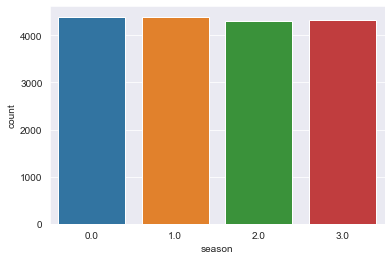

In [11]:
plt.figure(figsize=(6,4))   #mine
sns.countplot(x="season", data=df)

In [12]:
# season
#desired


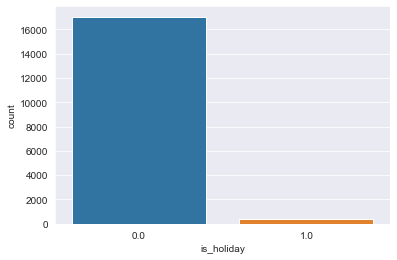

In [13]:
plt.figure(figsize=(6,4))   #mine
sns.countplot(x="is_holiday", data=df);

In [14]:
# is_holiday


In [15]:
# is_weekend


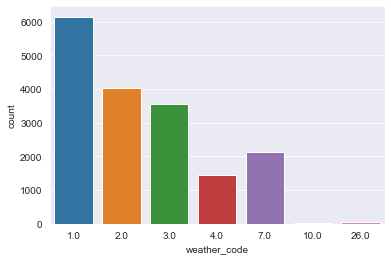

In [16]:
plt.figure(figsize=(6,4))   #mine
sns.countplot(x="weather_code", data=df);

In [17]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [18]:
from datetime import datetime

In [19]:
for i in df:
  print(i , " ", df[i].dtypes)

timestamp   object
cnt   int64
t1   float64
t2   float64
hum   float64
wind_speed   float64
weather_code   float64
is_holiday   float64
is_weekend   float64
season   float64


In [20]:
df["timestamp"] = pd.to_datetime(df.timestamp)

In [21]:
for i in df:
  print(i , " ", df[i].dtypes)

timestamp   datetime64[ns]
cnt   int64
t1   float64
t2   float64
hum   float64
wind_speed   float64
weather_code   float64
is_holiday   float64
is_weekend   float64
season   float64


In [22]:
df = df.set_index(df.timestamp)


In [23]:
df.head() #mine

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [24]:
#desired

- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

In [25]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2017-01-03 19:00:00,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
2017-01-03 22:00:00,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
2017-01-03 23:00:00,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [26]:
df.sample(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2016-04-28 12:00:00,2016-04-28 12:00:00,1213,10.5,9.5,37.5,17.0,2.0,0.0,0.0,0.0
2015-03-07 19:00:00,2015-03-07 19:00:00,857,9.5,7.0,76.5,17.0,1.0,0.0,1.0,0.0
2016-02-27 09:00:00,2016-02-27 09:00:00,753,5.0,1.5,63.5,17.0,3.0,0.0,1.0,3.0
2016-07-22 17:00:00,2016-07-22 17:00:00,3686,23.5,23.5,53.5,12.0,1.0,0.0,0.0,1.0
2015-06-23 19:00:00,2015-06-23 19:00:00,2702,19.0,19.0,47.5,8.5,1.0,0.0,0.0,1.0


In [27]:
df["day of the week"]=df.timestamp.dt.dayofweek
df["day of the month"]=df.timestamp.dt.strftime("%d")
df["hour"]=df.timestamp.dt.hour
df["month"]=df.timestamp.dt.month
df["year"]=df.timestamp.dt.year
df["year_of_month"] = df.timestamp.dt.strftime("%m %Y")


In [28]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day of the week,day of the month,hour,month,year,year_of_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,6,04,0,1,2015,01 2015
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,6,04,1,1,2015,01 2015
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,6,04,2,1,2015,01 2015
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,6,04,3,1,2015,01 2015
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,6,04,4,1,2015,01 2015


### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

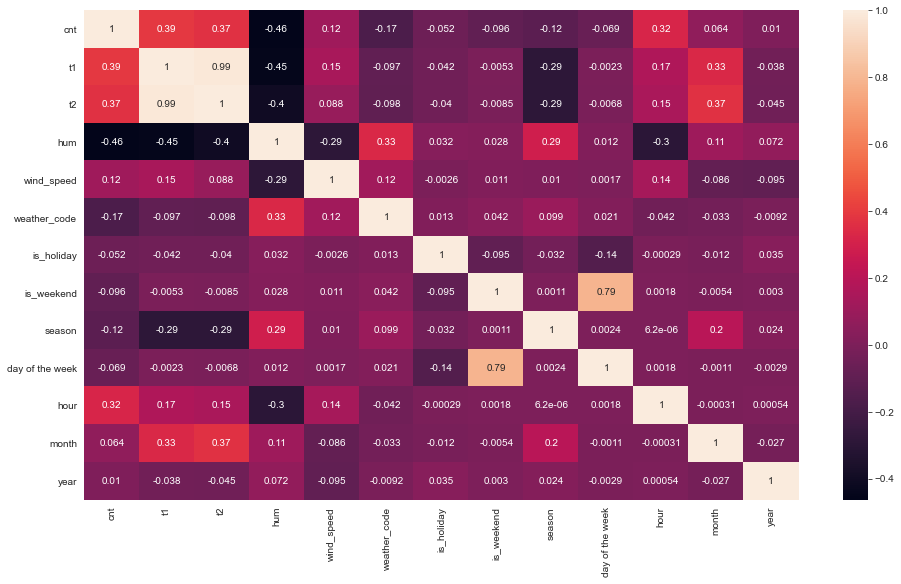

In [29]:
plt.figure(figsize=(16,9))  #mine

sns.heatmap(df.corr(), annot= True)

In [30]:
# for all variables 


In [31]:
korele = df.corr()

In [33]:
plt.figure(figsize=(16,9))
sns.heatmap(korele.drop(["t1",  "t2", "hum",  "wind_speed", "weather_code", "is_holiday", "is_weekend", "season", "day of the week" ,"day of the month",  "hour", "month",  "year"] , axis = 1), linewidth = 0.5, annot = True)

KeyError: "['day of the month'] not found in axis"

<Figure size 1152x648 with 0 Axes>

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [34]:
z = df.corrwith(df.cnt)
z = z.sort_values() 
z

hum               -0.462901
weather_code      -0.166633
season            -0.116180
is_weekend        -0.096499
day of the week   -0.068688
is_holiday        -0.051698
year               0.010046
month              0.063757
wind_speed         0.116295
hour               0.324423
t2                 0.369035
t1                 0.388798
cnt                1.000000
dtype: float64

<AxesSubplot:>

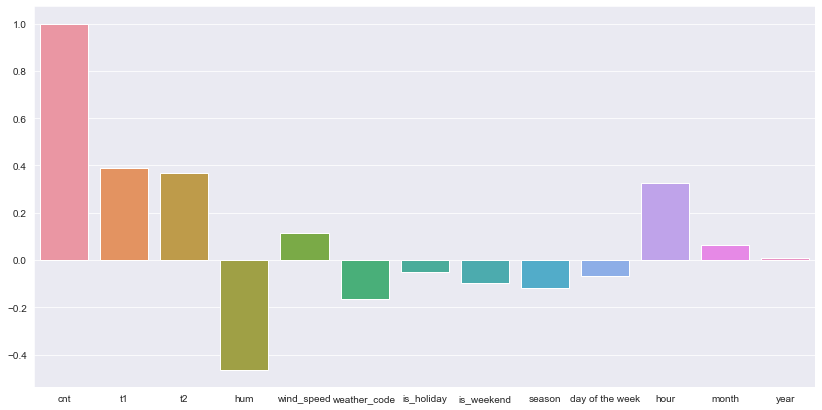

In [35]:
plt.figure(figsize=(14,7))

sns.barplot(x=df.corrwith(df.cnt).index, y=df.corrwith(df.cnt))


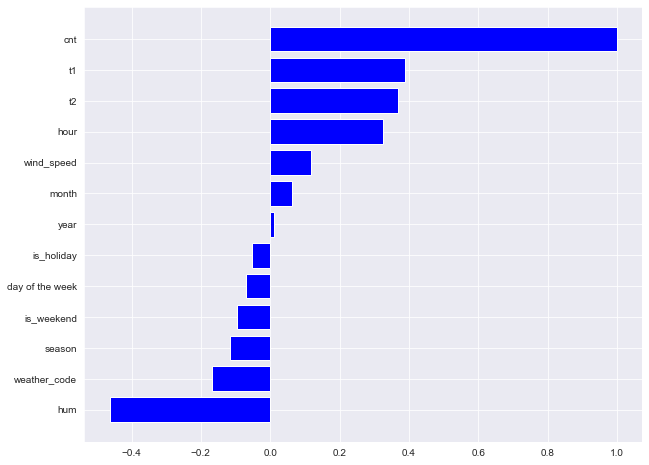

In [36]:
fig = plt.figure(figsize = (10, 8)) 
  
# creating the bar plot 
plt.barh(z.index, z, color ='blue', ) 
  
 
plt.show() 

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

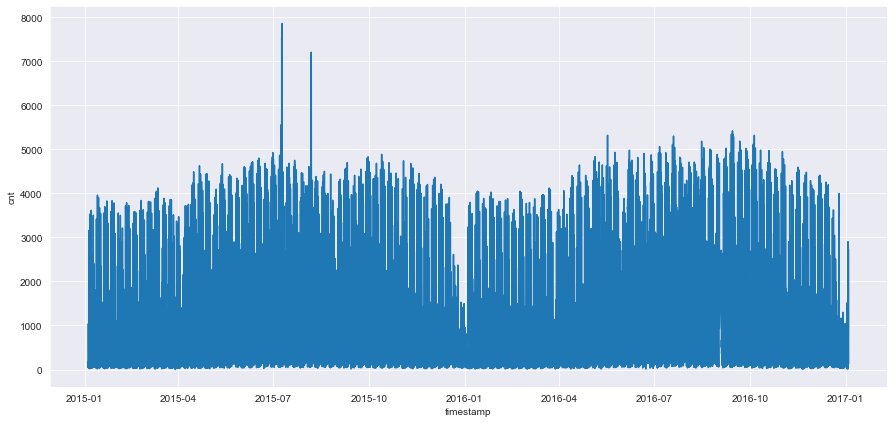

In [37]:
plt.figure(figsize=(15,7))
sns.lineplot(df.timestamp, df.cnt)


### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

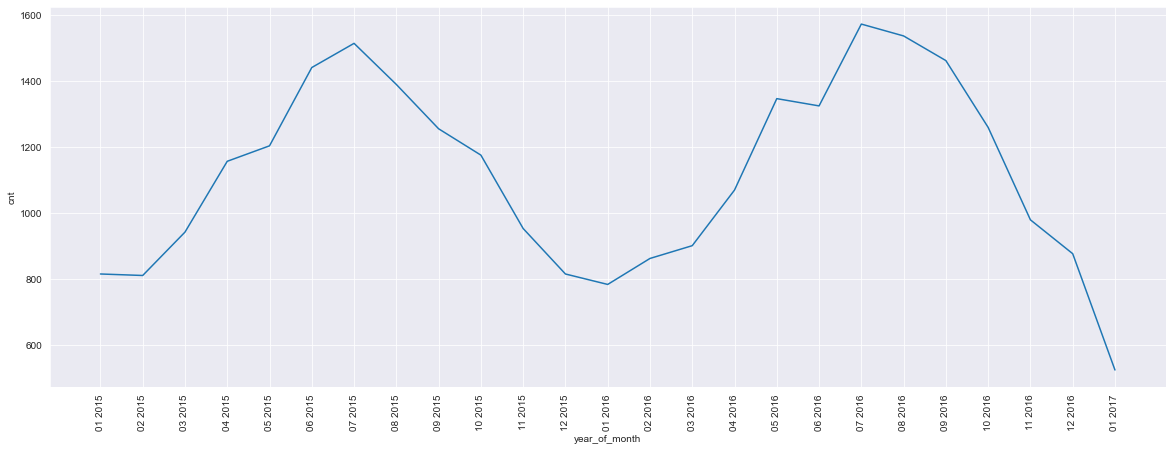

In [38]:
plt.figure(figsize=(20,7))
sns.lineplot(df.year_of_month, df.cnt, ci=None)
plt.xticks(rotation="vertical")



In [ ]:
# with lineplot
plt.figure(figsize=(8,5))
sns.lineplot(df.month, df.cnt)
plt.xticks(rotation="vertical")



In [ ]:
# with lineplot


In [ ]:
# with pointplot
plt.figure(figsize=(12,4))
sns.pointplot(df.month, df.cnt, ci=None,markers="x" )



In [ ]:
# with barplot

plt.figure(figsize=(9,5))
sns.barplot(df.month, df.cnt )

### 11.Plot bike shares by hours on (holidays, weekend, season)

In [ ]:
# with lineplot (*whether it is a holiday or not*)

sns.lineplot(df.hour, df.cnt , hue=df.is_holiday);

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns
plt.figure(figsize=(15,7))
sns.lineplot(df.hour, df.cnt , hue=df.season);


In [ ]:
fig, (ax1,ax2,ax3,ax4) =plt.subplots(4,figsize=(18,10),sharey=True)
ax1=sns.pointplot(df.hour,df.cnt,ax=ax1)
ax2=sns.pointplot(df.hour,df.cnt,hue=df.is_holiday, ax=ax2)
ax3=sns.pointplot(df.hour,df.cnt,hue=df.is_weekend, ax=ax3)
ax4=sns.pointplot(df.hour,df.cnt,hue=df.season, ax=ax4);

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

In [ ]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(x='day of the week',y=df.cnt,data = df, hue=df.is_weekend)




In [ ]:
# with pointplot

fig, (axa,axb) =plt.subplots(2,figsize=(14,10),sharey=True)
ax1=sns.pointplot(x='day of the week', y= df.cnt, data=df,ax=axa)
ax2=sns.pointplot(x='day of the week', y= df.cnt, data=df, hue=df.season, ax=axb)


### 13.Plot bike shares by day of month

In [ ]:
df3 = df.groupby('day of the month')["cnt"].mean().round()

In [ ]:
df3.reset_index().T

In [ ]:
df4= df.sort_values(["day of the month"])

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df4["day of the month"], y = df4.cnt);

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

In [ ]:
# with barplot
plt.figure(figsize=(12,6))
sns.barplot(df.year, df.cnt);





In [ ]:
# with barplot
plt.figure(figsize=(6,3))
sns.barplot(df.season, df.cnt);

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [ ]:
df.is_weekend.value_counts()

In [ ]:
# pie chart
plt.figure(figsize=(6,6))
plt.pie(x=df.is_weekend.value_counts(), autopct="%.1f%%",labels=["weekday","weekend"]);

In [ ]:
# with countplot

sns.countplot(df.is_weekend);



### 16.Plot the distribution of weather code by seasons

In [ ]:
# with countplot
sns.countplot(df.weather_code);

In [ ]:
# with catplot
sns.catplot(x= "weather_code", col="season",data=df, kind="count");


### 17.Visulaize all the continuous variables with histogram and scatterplot

In [ ]:
plt.hist(data, range=(1,4), bins=8)
plt.show()

In [ ]:
fig, (ax1,ax2,ax3,ax4) =plt.subplots((2,2),figsize=(18,10),sharey=True)
ax1.hist(x=df.t1, bins=5)
ax2.hist(x=df.t2)
ax3.hist(x=windspeed)
ax4.hist(x=df.hum)


In [ ]:
# matplotlip hist
fig, axes = plt.subplots(2, 2, figsize=(10,10))
df.hist('t1', bins=10, ax=axes[0,0])
df.hist('t2', bins=10, ax=axes[0,1])
df.hist('wind_speed', bins=10, ax=axes[1,0])
df.hist('hum', bins=10, ax=axes[1,1])


In [ ]:
# matplotlib scatterplot


In [ ]:
fig, ax = plt.subplots(2, figsize=(14, 10))
sns.scatterplot(x = df['t1'], y = df['hum'],data=df, hue=df["season"], ax=ax[0], palette="magma")
sns.scatterplot(x = df['t1'], y = df['wind_speed'],data=df, hue=df["season"], ax=ax[1] ,palette="magma")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___